In [83]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")

# Part 1-Data preparation and Preprocessing
## (1) Describe the dataset:
1. What are the categories/domains of dataset?

In [84]:
print(data.iloc[0])
print("number of data:",len(data))
for i in range(len(data.iloc[0])):
    print("The type of",data.columns[i],":",type(data.iloc[0,i]))

Id                                                            37404348
Title                                         Casual Stock Replenisher
Company                                                    Aldi Stores
Date                                          2018-10-07T00:00:00.000Z
Location                                                        Sydney
Area                                       North West & Hills District
Classification                              Retail & Consumer Products
SubClassification                                    Retail Assistants
Requirement          Our Casual Stock Replenishers pride themselves...
FullDescription                                                    NaN
LowestSalary                                                         0
HighestSalary                                                       30
JobType                                                            NaN
Name: 0, dtype: object
number of data: 318477
The type of Id : <class 'int'>


The number of this dataset is 318477. 

There are 13 columns in the dataset, and they and their types are:

The type of Id : <class 'int'>

The type of Title : <class 'str'>

The type of Company : <class 'str'>

The type of Date : <class 'str'>

The type of Location : <class 'str'>

The type of Area : <class 'str'>

The type of Classification : <class 'str'>

The type of SubClassification : <class 'str'>

The type of Requirement : <class 'str'>

The type of FullDescription : <class 'float'>

The type of LowestSalary : <class 'numpy.int64'>

The type of HighestSalary : <class 'numpy.int64'>

The type of JobType : <class 'float'>

The primary dataset that we would like to use is the job market dataset 
which is provided in CSV format.

I will use attributes: Title, Company, Date, Location, Classification, SubClassification, LowestSalary, HighestSalary in dataset: data.


## (2) Describe the steps you used for data preparation and preprocessing.

I load the data with pandas.read_csv(), after which the data are restored in "data". Preparation and preprocessing I have done is in each part below when it is needed. 
1. I build another data called new_date to seperate Date into three parts: Year, Month and Day.

2. I delete data with null values because they are not easy to deal with. 

3. I seperate dataset by group in order to be easy to understand.

## (3) What is your hypothesis (expection) about the analysis outcome?
I want to know the features of different features and numbers of different columns to make it easier to find jobs for different people. I will study these data by companies, sectors and locations. 

# Part 2-Data Analysis and Interpretation
## (1) Study the jod metadata. Extract the relevant information to describe the job's attributes.

The sector is the name of Company. The sub-sector is the title of Company.

In [85]:
print("ALL jobs shown in title and company:")
print(data[["Company","Title","Id"]].groupby(["Company","Title"]).count().rename(columns={'Id':"Number"}).sort_values(by='Number',ascending=False))

ALL jobs shown in title and company:
                                                                                                Number
Company                                     Title                                                     
Department of Education & Training Victoria Classroom Teacher                                      131
G8 Education                                Early Childhood Teacher                                100
Aldi Stores                                 Retail Assistant                                        90
Hays Office Support                         Executive Assistant                                     85
UBER                                        Uber Driver Partner                                     81
...                                                                                                ...
HCA Doctors                                 Private Billing Practice offering a Permanent f...       1
                                    

The data below is the number of jobs of each company.

In [86]:
print(data[["Company","Id"]].groupby(["Company"]).count().rename(columns={'Id':"Number"}).sort_values(by='Number',ascending=False))

                             Number
Company                            
Jora Local                     9354
Hudson                         1668
Design & Build                 1547
Robert Walters                 1385
Paxus                          1325
...                             ...
Hugh Reilly Real Estate           1
Hufcor Pty Ltd                    1
Hudsons GM                        1
Hudsons Catering                  1
Laing and Simmons Narrabeen       1

[40628 rows x 1 columns]


The location of each job is below:

In [87]:
print(data[['Company','Title','Location','Area']])

                                                  Company  \
0                                             Aldi Stores   
1                                             Aldi Stores   
2                                     LB Creative Pty Ltd   
3                                  Anaconda Group Pty Ltd   
4          Commonwealth Bank - Business & Private Banking   
...                                                   ...   
318472                                            Talenza   
318473  Talent – Winner ‘Seek Large Recruitment Agency...   
318474                   Retail Career Consulting Pty Ltd   
318475                                         Moir Group   
318476                                 Austcorp Executive   

                                                    Title  \
0                                Casual Stock Replenisher   
1                                Casual Stock Replenisher   
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3                      

The data below is the range of salary of each sector and sub sector.

In [88]:
print("Salary range by company and title:")
print(data[["Company","Title","LowestSalary"]].groupby(["Company","Title"]).mean().join(data[["Company","Title","HighestSalary"]].groupby(["Company","Title"]).mean()).sort_values(by=["LowestSalary","HighestSalary"],ascending=False))

Salary range by company and title:
                                                                    LowestSalary  \
Company                Title                                                       
17 Ways Pty Ltd        Linux Engineer (RHEL)                               200.0   
2XM Recruit            Project Manager ($100mil Education project)         200.0   
                       Senior Project Engineer                             200.0   
                       Spray Seal Supervisor                               200.0   
2XM Technology Pty Ltd Business Analyst - Data                             200.0   
...                                                                          ...   
yourtown               Placement Consultant Jobactive Caboolture             0.0   
                       Placement Consultant Jobactive Salisbury              0.0   
                       Receptionist - Part Time                              0.0   
                       Risk Specialist   

In [89]:
print("Salary range by company:")
print(data[["Company","LowestSalary"]].groupby(["Company"]).mean().join(data[["Company","HighestSalary"]].groupby(["Company"]).mean()).sort_values(by=["LowestSalary","HighestSalary"],ascending=False))

Salary range by company:
                            LowestSalary  HighestSalary
Company                                                
17 Ways Pty Ltd                    200.0          999.0
ABBA Group                         200.0          999.0
ADANI MINING PTY LTD               200.0          999.0
ANC Cranes Pty Ltd                 200.0          999.0
ANC Forestry Group Pty Ltd         200.0          999.0
...                                  ...            ...
wilo beauty                          0.0           30.0
wiz electrical                       0.0           30.0
xnz pty ltd                          0.0           30.0
ymca                                 0.0           30.0
zooi cafe pty ltd                    0.0           30.0

[40628 rows x 2 columns]


## (2) Study the market by locations

In [90]:
print("The number of jobs by areas:")
print(data[["Area","Id"]].groupby("Area").count().rename(columns={"Id":"Number"}).sort_values(by='Number',ascending=False))

The number of jobs by areas:
                                     Number
Area                                       
CBD & Inner Suburbs                   32170
CBD, Inner West & Eastern Suburbs     29059
Parramatta & Western Suburbs           8769
Bayside & South Eastern Suburbs        6707
North Shore & Northern Beaches         6656
Northern Suburbs                       6436
Eastern Suburbs                        6361
CBD, Inner & Western Suburbs           5570
Western Suburbs                        4285
South West & M5 Corridor               3190
Southern Suburbs & Sutherland Shire    2239
Southern Suburbs & Logan               2137
Ryde & Macquarie Park                  1960
North West & Hills District            1905
Fremantle & Southern Suburbs           1804
Northern Suburbs & Joondalup           1199
Western Suburbs & Ipswich              1190
Bayside & Eastern Suburbs               657
Rockingham & Kwinana                    364


We can know that CBD & Inner Suburbs area has the most number of jobs and Rockingham & Kwinana has the least. The range of number of jobs group by area is between 32170 to 364.

In [91]:
print("The number of jobs by Locations:")
print(data[["Location","Id"]].groupby("Location").count().rename(columns={"Id":"Number"}).sort_values(by='Number',ascending=False))

The number of jobs by Locations:
                                      Number
Location                                    
Sydney                                 60765
Melbourne                              46690
Brisbane                               21466
Perth                                  13198
Adelaide                                6653
ACT                                     6250
Newcastle, Maitland & Hunter            3958
Gold Coast                              3588
South West Coast VIC                    1790
Mackay & Coalfields                     1701
Port Hedland, Karratha & Pilbara        1667
Wollongong, Illawarra & South Coast     1657
Sunshine Coast                          1554
Cairns & Far North                      1509
Northern QLD                            1493
Gosford & Central Coast                 1343
Toowoomba & Darling Downs               1310
Darwin                                  1266
Hobart                                  1051
Blue Mountains & Centr

We can know that location Sydney has the most jobs and Central & South East TAS has the least. The range of number of jobs group by location is between 60765 to 57.

In [92]:
print("Average salary group by areas:")
print(data[["Area","LowestSalary"]].groupby(["Area"]).mean().join(data[["Area","HighestSalary"]].groupby(["Area"]).mean()).sort_values(by=["LowestSalary","HighestSalary"],ascending=False))

Average salary group by areas:
                                     LowestSalary  HighestSalary
Area                                                            
CBD, Inner West & Eastern Suburbs       78.883306     151.060807
Ryde & Macquarie Park                   74.107143     133.289286
CBD & Inner Suburbs                     72.404414     135.190208
CBD, Inner & Western Suburbs            72.087971     128.846679
North Shore & Northern Beaches          63.737981     111.699970
Parramatta & Western Suburbs            59.942981     107.247463
North West & Hills District             57.790026      95.004724
Rockingham & Kwinana                    55.549451      88.142857
Bayside & Eastern Suburbs               53.729072      92.391172
Western Suburbs & Ipswich               52.218487      83.326891
Fremantle & Southern Suburbs            52.073171      82.915188
Northern Suburbs & Joondalup            51.709758      79.560467
Eastern Suburbs                         51.344128      79.8

We can find that for each area, the average highest salary is near twice than average lowest salary.

In [93]:
print("Range of salary group by areas:")
print(data[["Area","LowestSalary"]].groupby(["Area"]).min().join(data[["Area","HighestSalary"]].groupby(["Area"]).max()).sort_values(by=["LowestSalary","HighestSalary"],ascending=False))

Range of salary group by areas:
                                     LowestSalary  HighestSalary
Area                                                            
Bayside & Eastern Suburbs                       0            999
Bayside & South Eastern Suburbs                 0            999
CBD & Inner Suburbs                             0            999
CBD, Inner & Western Suburbs                    0            999
CBD, Inner West & Eastern Suburbs               0            999
Eastern Suburbs                                 0            999
Fremantle & Southern Suburbs                    0            999
North Shore & Northern Beaches                  0            999
North West & Hills District                     0            999
Northern Suburbs                                0            999
Northern Suburbs & Joondalup                    0            999
Parramatta & Western Suburbs                    0            999
Rockingham & Kwinana                            0         

We can find that for each area, the lowest salary is 0 and highest salary is 999.

In [94]:
print("Average salary group by locations:")
print(data[["Location","LowestSalary"]].groupby(["Location"]).mean().join(data[["Location","HighestSalary"]].groupby(["Location"]).mean()).sort_values(by=["LowestSalary","HighestSalary"],ascending=False))

Average salary group by locations:
                                      LowestSalary  HighestSalary
Location                                                         
ACT                                      86.174400     198.718240
Port Hedland, Karratha & Pilbara         77.522496     121.421716
Kalgoorlie, Goldfields & Esperance       76.137931     115.647126
Geraldton, Gascoyne & Midwest            73.489736     128.756598
Coober Pedy & Outback SA                 73.303571     107.125000
Sydney                                   71.882004     134.751041
Port Macquarie & Mid North Coast         71.812367     149.605544
Mackay & Coalfields                      69.711934     113.816578
Western QLD                              69.357977     134.128405
Far West & North Central NSW             69.289340     110.888325
Darwin                                   68.467615     120.466035
Tumut, Snowy & Monaro                    67.558140     133.081395
Perth                                    

In [95]:
print("Range of salary group by locations:")
print(data[["Location","LowestSalary"]].groupby(["Location"]).min().join(data[["Location","HighestSalary"]].groupby(["Location"]).max()).sort_values(by=["LowestSalary","HighestSalary"],ascending=False))

Range of salary group by locations:
                                      LowestSalary  HighestSalary
Location                                                         
ACT                                              0            999
Adelaide                                         0            999
Adelaide Hills & Barossa                         0            999
Albany & Great Southern                          0            999
Albury Area                                      0            999
Alice Springs & Central Australia                0            999
Bairnsdale & Gippsland                           0            999
Ballarat & Central Highlands                     0            999
Bendigo, Goldfields & Macedon Ranges             0            999
Blue Mountains & Central West                    0            999
Brisbane                                         0            999
Broome & Kimberley                               0            999
Bunbury & South West                    

We can find that for each location, the lowest salary is 0 and highest salary is 999. Of course, for jobs in company and title, the range of salary is different.

In [96]:
date = []
for i in range(len(data)):
    tmp = data.iloc[[i],[3]].to_numpy()[0][0]
    if tmp == tmp:
        tmp = tmp.split("-")
        tmp[2] = int(tmp[2][0:2])
        date.append(tmp)
    else:
        date.append([])

In [97]:
date = pd.DataFrame(date)
date.columns = ["Year", "Month", "Day"]

In [98]:
print(date)

        Year Month  Day
0       2018    10    7
1       2018    10    7
2       2018    10    7
3       2018    10    7
4       2018    10    7
...      ...   ...  ...
318472  2019    03   13
318473  2019    03   13
318474  2019    03   12
318475  2019    03    8
318476  2019    03   13

[318477 rows x 3 columns]


In [99]:
print(date[["Year","Day"]].groupby(["Year"]).count().rename(columns={"Day":"Number"}))

      Number
Year        
2018  226396
2019   92081


In [100]:
print(date[["Year","Month","Day"]].groupby(["Year","Month"]).count().rename(columns={"Day":"Number"}))

            Number
Year Month        
2018 10     113782
     11      40988
     12      71626
2019 01      69676
     02      22003
     03        402


In [101]:
print(date[["Year","Day"]].groupby(["Day"]).count().rename(columns={"Year":"Number"}).sort_values(by=["Number"],ascending=False))

     Number
Day        
10    20138
12    17503
4     16728
18    16151
9     15822
17    15539
11    15448
5     15028
13    14793
14    14656
21    13684
3     12215
7     11309
22    10950
31    10652
15    10132
2      9675
30     9589
8      9276
20     8910
19     8720
16     8332
6      6984
29     5946
1      4374
27     3557
28     3225
26     2820
24     2542
25     2015
23     1764


In [102]:
print(date[["Year","Day"]].groupby(["Day"]).count().rename(columns={"Year":"Number"}).sort_values(by=["Number"],ascending=False))

     Number
Day        
10    20138
12    17503
4     16728
18    16151
9     15822
17    15539
11    15448
5     15028
13    14793
14    14656
21    13684
3     12215
7     11309
22    10950
31    10652
15    10132
2      9675
30     9589
8      9276
20     8910
19     8720
16     8332
6      6984
29     5946
1      4374
27     3557
28     3225
26     2820
24     2542
25     2015
23     1764


In [103]:
d_x = date[["Year","Day"]].groupby(["Day"]).count().rename(columns={"Year":"Number"}).sort_values(by=['Day',],ascending=True)

In [104]:
print(d_x)

     Number
Day        
1      4374
2      9675
3     12215
4     16728
5     15028
6      6984
7     11309
8      9276
9     15822
10    20138
11    15448
12    17503
13    14793
14    14656
15    10132
16     8332
17    15539
18    16151
19     8720
20     8910
21    13684
22    10950
23     1764
24     2542
25     2015
26     2820
27     3557
28     3225
29     5946
30     9589
31    10652


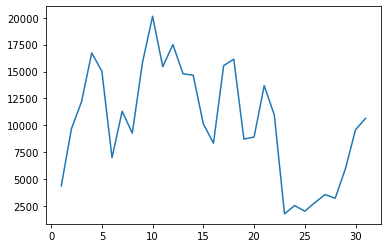

In [105]:
import matplotlib.pyplot as plt
plt.plot(d_x.index,d_x['Number'])
plt.show()

From the graph we can know that in each month, near 5, 15 and 25 there are troughs of jobs. There are peaks near 10 and 30.

## (3) Study the market by sectors

In [106]:
print("Different numbers of classification:")
print(data[["Id","Classification"]].groupby("Classification").count().rename(columns={"Id":"Number"}).sort_values(by=["Number"],ascending=False))

Different numbers of classification:
                                        Number
Classification                                
Information & Communication Technology   22796
Trades & Services                        17976
Healthcare & Medical                     17085
Hospitality & Tourism                    15523
Manufacturing, Transport & Logistics     12376
Administration & Office Support          10020
Accounting                                9368
Education & Training                      9280
Construction                              8372
Sales                                     8119
Retail & Consumer Products                8041
Government & Defence                      7443
Engineering                               6458
Mining, Resources & Energy                6288
Banking & Financial Services              4633
Community Services & Development          4485
Legal                                     4237
Human Resources & Recruitment             4144
Call Centre & Customer 

Information & Communication Technology has the most jobs and Self Employment has the least jobs.

In [107]:
print("Different numbers of subclassification:")
d = data[["Id","Classification","SubClassification"]].groupby(["Classification","SubClassification"]).count().rename(columns={"Id":"Number"}).sort_values(by=["Classification","Number"],ascending=False)
print(data[["Id","Classification","SubClassification"]].groupby(["Classification","SubClassification"]).count().rename(columns={"Id":"Number"}).sort_values(by=["Classification","Number"],ascending=False))

Different numbers of subclassification:
                                                       Number
Classification    SubClassification                          
Trades & Services Automotive Trades                      3262
                  Electricians                           1783
                  Labourers                              1536
                  Fitters, Turners & Machinists          1334
                  Technicians                            1161
...                                                       ...
Accounting        Insolvency & Corporate Recovery          49
                  Cost Accounting                          41
                  Inventory & Fixed Assets                 25
                  Forensic Accounting & Investigation      24
                  Company Secretaries                      19

[396 rows x 1 columns]


From data below we can know the maximum number of jobs gourp by classification and sub classification. We can know the minimum of maximum of number of jobs of each Classification is 93 of Classification-self Employment and SubClassification:Self Employment and the maximum of maximum of number of jobs of each Classification is 4600 of Classification Hospitality & Tourism and sub classification Waiting Staff.

In [108]:
d = d.reset_index()
d = d.groupby('Classification').max().reset_index()
d.sort_values(by=['Number'])

,Classification,SubClassification,Number
27,Self Employment,Self Employment,93
2,"Advertising, Arts & Media",Promotions,147
12,"Farming, Animals & Conservation",Winery & Viticulture,171
26,Science & Technology,Quality Assurance & Control,197
8,Consulting & Strategy,Strategy & Planning,344
28,Sport & Recreation,Other,406
9,Design & Architecture,Web & Interaction Design,436
4,CEO & General Management,Other,520
18,Insurance & Superannuation,Workers' Compensation,536
3,Banking & Financial Services,Treasury,723


In [109]:
print("Average salary group by classification:")
print(data[["Classification","SubClassification","LowestSalary"]].groupby(["Classification","SubClassification"]).mean().join(data[["Classification","SubClassification","HighestSalary"]].groupby(["Classification","SubClassification"]).mean()).sort_values(by=["Classification","HighestSalary","LowestSalary"],ascending=False))

Average salary group by classification:
                                                           LowestSalary  \
Classification    SubClassification                                       
Trades & Services Electricians                                55.541223   
                  Fitters, Turners & Machinists               53.733133   
                  Air Conditioning & Refrigeration            52.543860   
                  Plumbers                                    47.354497   
                  Welders & Boilermakers                      48.017316   
...                                                                 ...   
Accounting        Accounts Officers/Clerks                    44.090420   
                  Accounts Payable                            42.241055   
                  Assistant Accountants                       43.957845   
                  Accounts Receivable/Credit Control          44.019608   
                  Bookkeeping & Small Practice Accounting   

In [110]:
print("Range of salary group by classification:")
print(data[["Classification","SubClassification","LowestSalary"]].groupby(["Classification","SubClassification"]).min().join(data[["Classification","SubClassification","HighestSalary"]].groupby(["Classification","SubClassification"]).max()).sort_values(by=["Classification","HighestSalary","LowestSalary"],ascending=False))

Range of salary group by classification:
                                                           LowestSalary  \
Classification    SubClassification                                       
Trades & Services Air Conditioning & Refrigeration                    0   
                  Automotive Trades                                   0   
                  Building Trades                                     0   
                  Carpentry & Cabinet Making                          0   
                  Cleaning Services                                   0   
...                                                                 ...   
Accounting        Bookkeeping & Small Practice Accounting             0   
                  Cost Accounting                                     0   
                  Insolvency & Corporate Recovery                     0   
                  Systems Accounting & IT Audit                       0   
                  Inventory & Fixed Assets                 

In [111]:
print("Number of different Classification and SubClassification")
print(data[["Classification","SubClassification","Id"]].groupby(["Classification","SubClassification"]).count().rename(columns={"SubClassification":"Skills","Id":"Number"}))

Number of different Classification and SubClassification
                                                      Number
Classification    SubClassification                         
Accounting        Accounts Officers/Clerks               929
                  Accounts Payable                       531
                  Accounts Receivable/Credit Control     612
                  Analysis & Reporting                   530
                  Assistant Accountants                  427
...                                                      ...
Trades & Services Printing & Publishing Services         154
                  Security Services                      483
                  Tailors & Dressmakers                   35
                  Technicians                           1161
                  Welders & Boilermakers                1155

[396 rows x 1 columns]


## (4) Visualize the results.

In [112]:
new_data=data.join(date)

In [113]:
print(new_data.head())

         Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   

                  Location                         Area  \
0                   Sydney  North West & Hills District   
1    Richm

Columns and names must be legal values!
For example:


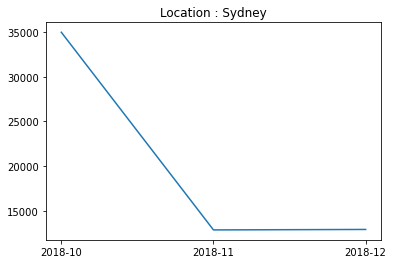

In [114]:
import matplotlib.pyplot as plt
def plt_by(column, name):
    x = new_data[["Id",column,"Year","Month"]].loc[new_data[column] == name].groupby(["Year","Month"]).count().rename(columns={"Id":"Number"}).index.tolist()
    if len(x) == 0:
        print("Something wrong, please retry!")
        return
    for i in range(len(x)):
        x[i] = str(x[i][0])+"-"+str(x[i][1])
    y = new_data[["Id",column,"Year","Month"]].loc[new_data[column] == name].groupby(["Year","Month"]).count().rename(columns={"Id":"Number"})["Number"].to_numpy()
    plt.plot(x,y)
    plt.title(column+" : "+name)
    plt.show()
print("Columns and names must be legal values!")
print("For example:")
plt_by("Location","Sydney")

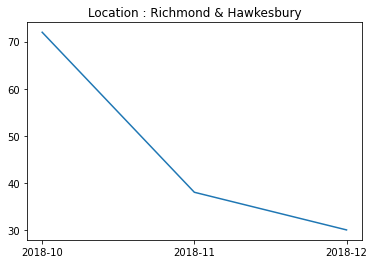

In [115]:
plt_by("Location","Richmond & Hawkesbury" )

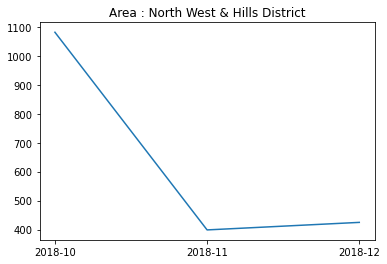

In [116]:
plt_by("Area","North West & Hills District" )

# Part 3-Evaluation
## (1) What are the findings of your data analytics for the above sections?

(1) In October, November, December three months, the order of number of jobs is October > November > December. 

(2) For some reasons, the number of jobs in 2019 is much smaller than the number in 2018.

(3) At the beginning and end of each month, the number of jobs is fewer than the number in the middle of month on average.

(4) IT has better working condition than others based on the number of jobs and average salary.

(5) Jobs in November are generally less than the number of jobs in other two months. So It's better to search for jobs before November.

## (2) What actions for balancing the markets do you suggest based on your findings?

For individuals, it's better to search for jobs at the beginning or end of a month instead of in the middle of a month. It's better to search for jobs in IT and Health care because they have many needs and the salary is not bad.

For government, it's better to carry out employment guidance and training before October, leave the unemployed some time to learn new skills then to find jobs at the peak near October instead of in the trough near December.

## (3) How could you refine your data analytics?
I need to use natural language processing skills to analyse the requirement and full description to conclude them in several words, then I can know more detailed information about the market.

I want to know the welfare and more detailed information about the company. I want to know the detailed location of each job.

## (4) Are there any implications for employers and employees based on the findings you obtained? Justify your answer.

Both employers and employees need to modify their strategies about jobs to reach their goals. For employers, they can increase salary at the peak and decrease salary in the trough to maximize economic benefits. For employees, they seize the opportunity at the peak. They also need to think the company, location and industry based on their skills, experience and target salary.

# Part 4 - Case Studies
## Case Study 1:

In computer science, there are many industries that can provide high salary for him, such as VM engineer, security architectist, data sciencist, x3 DevOps Engineer, Net Developer, Java Developer and so on. 

In [117]:
pd.set_option('max_columns',1000)
pd.set_option('max_ro',300)
p = data.loc[data["Classification"]=="Information & Communication Technology"][["Requirement","HighestSalary"]].sort_values(by=["HighestSalary"], ascending=False).drop_duplicates().iloc[0:100]["Requirement"].tolist()
print(p)

['VMware Engineer needed for a VmWare Migration project. We have a project required to migrate an ESXi Server remotely.', 'Security Solution Architect needed to assist with Perimeter and Data Leakage protection design. Contract role based in Sydney CBD', 'Exciting new career opportunity to lead the provision\xa0of operational direction of DSG', 'Exciting new career opportunity to lead the strategic digital customer experience', 'An exciting opportunity to lead information management across NSW government', 'Immediate requirement for Program Managers to join a leading Federal Government Department in Melbourne for a 12-month contract!', "One of Australia's biggest organisations is looking for a senior delivery leader who will own the backlog of a large area of work", 'Lotus Notes Administrator for Federal Government Project. Australian Citizen . NV1 Security Clearance. 6 months role. Hourly Rate $100 to $110.', 'You will possess strong SQLServer experience and able to develop, maintain 

## Case Study 2:

First, I will select jobs based on basic information like company, location and salary to get a small set of jobs, then I will use NLP and other analysis skills to find jobs meet his ability and requirement. I can also use machine learning to find shortest distance between his situation and target jobs based on labelled data or ublabelled data.
What's more, I will add labels as part of descriptions of jobs and needs. For example, a need for programmer can be labelled by programming language: c++, java or python and so on. With labels, it is better and more precise for recommend jobs for people.

